# 6.7 Exporing Relationships

## This Script Contains the Following points

### 1. Importing Libraries
### 2. Importing  and Checking Data sets
### 3. Correlation Heatmap Prep Data and Merge
### 4. Correlation Heatmap
### 5. Scatterplots

### 6. Categorical Plot



### 7. Export Data to pickle files

### 1. Importing Libraries

In [1]:
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Importing and Checking Data sets

In [2]:
# Import .pkl files

#First create a string of the path for th emain project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach6_Dashboard/Economic_Freedom_Analysis/'

#Import Data
df_EconFreeData = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'EconFreeData.pkl'))
df_GDP = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','GDP.pkl'))
df_Pop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Pop.pkl'))
df_CPI = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','CPI.pkl'))
df_Unemployment = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Unemployment.pkl'))
df_Education = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Education.pkl'))
df_Continent = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Continent.pkl'))
df_IncomeGroup = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','IncomeGroup.pkl'))
df_Indicators= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Indicators.pkl'))



In [3]:
# Check heads

print(df_EconFreeData.head(5))
print()
print(df_GDP.head(5))
print()
print(df_Pop.head(5))
print()
print(df_CPI.head(5))
print()
print(df_Unemployment.head(5))
print()
print(df_Education.head(5))
print()
print(df_Continent.head(5))
print()
print(df_IncomeGroup.head(5))
print()
print(df_Indicators.head(5))

   Year    Country  Economic Freedom Summary Index   Rank  Quartile
0  2021    Albania                            7.60   31.0       1.0
1  2021    Algeria                            4.82  157.0       4.0
2  2021     Angola                            5.38  149.0       4.0
3  2021  Argentina                            4.77  158.0       4.0
4  2021    Armenia                            7.58   33.0       1.0

       Country  Year  GDP_PerCapita  GDP_2010Prices_Millions
0  Afghanistan  1995          152.0                   6335.0
1  Afghanistan  2005          242.0                   9596.0
2  Afghanistan  2010          504.0                  14744.0
3  Afghanistan  2015          544.0                  18713.0
4  Afghanistan  2018          496.0                  19738.0

          Country  Year  Pop_mill  Pop_male_mill  Pop_female_mill  \
0     Afghanistan  2010     28.19          14.24            13.95   
1         Albania  2010      2.91           1.46             1.45   
2         Algeria

In [4]:
# Descriptive Statistics

print('df_EconFreeData.describe()')
print(df_EconFreeData.describe())
print()
print('df_GDP.describe()')
print(df_GDP.describe())
print()
print('df_Pop.describe()')
print(df_Pop.describe())
print()
print('df_CPI.describe()')
print(df_CPI.describe())
print()
print('df_Unemployment.describe()')
print(df_Unemployment.describe())
print()
print('df_Education.describe()')
print(df_Education.describe())
print()
print('df_Continent.describe()')
print(df_Continent.describe())
print()
print('df_IncomeGroup.describe()')
print(df_IncomeGroup.describe())
print()
print('df_Indicators.describe()')
print(df_Indicators.describe())


df_EconFreeData.describe()
              Year  Economic Freedom Summary Index         Rank     Quartile
count  4620.000000                     3941.000000  3941.000000  3941.000000
mean   2004.500000                        6.531094    72.315148     2.475768
std      13.389877                        1.221003    43.216456     1.111424
min    1970.000000                        1.870000     1.000000     1.000000
25%    2000.750000                        5.780000    36.000000     1.000000
50%    2007.500000                        6.630000    71.000000     2.000000
75%    2014.250000                        7.460000   106.000000     3.000000
max    2021.000000                        9.280000   165.000000     4.000000

df_GDP.describe()
              Year  GDP_PerCapita  GDP_2010Prices_Millions
count  1481.000000    1481.000000             1.481000e+03
mean   2011.751519   14873.457124             3.250801e+05
std       8.422804   23747.766257             1.479637e+06
min    1995.000000      9

### 3. Correlation Heatmap Prep Data and Merge

In [5]:
# Limit Economic Freedom index to most recent year.
df_EconFree_2021 = df_EconFreeData.loc[df_EconFreeData['Year'].isin([2021])]
df_EconFree_2021 = df_EconFree_2021.drop(['Year'], axis = 1)

In [6]:
df_EconFree_2021.head()

,Country,Economic Freedom Summary Index,Rank,Quartile
0,Albania,7.60,31.0,1.0
1,Algeria,4.82,157.0,4.0
2,Angola,5.38,149.0,4.0
3,Argentina,4.77,158.0,4.0
4,Armenia,7.58,33.0,1.0


In [7]:
df_EconFree_2021.shape

(165, 4)

In [8]:
#Limit GDP to most recent year
df_GDP_2020 = df_GDP.loc[df_GDP['Year'].isin([2020])]
df_GDP_2020 = df_GDP_2020.drop(['Year'], axis = 1)
print(df_GDP_2020.head())
print('')
print(df_GDP_2020.shape)

        Country  GDP_PerCapita  GDP_2010Prices_Millions
6   Afghanistan          508.0                  20113.0
13      Albania         5181.0                  12541.0
20      Algeria         3368.0                 168331.0
27      Andorra        37072.0                   2648.0
34       Angola         1896.0                 105625.0

(212, 3)


In [9]:
#Limit Population to most recent year
df_Pop_2022 = df_Pop.loc[df_Pop['Year'].isin([2022])]
df_Pop_2022 = df_Pop_2022.drop(['Year'], axis = 1)
print(df_Pop_2022.head())
print('')
print(df_Pop_2022.shape)

            Country  Pop_mill  Pop_male_mill  Pop_female_mill  Pop_0_14_per  \
693     Afghanistan     41.13          20.77            20.36          43.1   
694         Albania      2.84           1.42             1.42          16.1   
695         Algeria     44.90          22.86            22.04          30.6   
696  American Samoa      0.04           0.02             0.02          27.1   
697         Andorra      0.08           0.04             0.04          12.8   

     Pop_60_plus_per  Pop_density  Surface_area_thou_km2  
693              3.8         63.3                    NaN  
694             23.5        103.7                    NaN  
695              9.7         18.9                    NaN  
696             12.1        221.4                    NaN  
697             21.6        169.8                    NaN  

(233, 8)


In [10]:
#Limit CPI to most recent year
df_CPI_2021 = df_CPI.loc[df_CPI['Year'].isin([2021])]
df_CPI_2021 = df_CPI_2021.drop(['Year'], axis = 1)
print(df_CPI_2021.head())
print('')
print(df_CPI_2021.shape)

                    Country  CPI_General  CPI_Food
1072  Aland Islands Islands        114.7     119.8
1073                Albania        123.5     144.9
1074                Algeria        166.2     161.7
1075                Andorra        108.1     120.6
1076               Anguilla        108.5     120.4

(165, 3)


In [11]:
#Limit Unemployment to most recent year
df_Unemployment_2022 = df_Unemployment.loc[df_Unemployment['Year'].isin([2022])]
df_Unemployment_2022 = df_Unemployment_2022.drop(['Year'], axis = 1)
print(df_Unemployment_2022.head())
print('')
print(df_Unemployment_2022.shape)

         Country  Unemp_Male  Unemp_Female  Unemp_Total
591  Afghanistan        17.0          26.4         18.5
592      Albania        10.8          10.9         10.9
593      Algeria         9.9          21.5         12.2
594       Angola         7.7           8.8          8.3
595    Argentina         8.9          12.8         10.6

(188, 4)


In [12]:
#Limit Education to the year with the most data
df_Education_2005 = df_Education.loc[df_Education['Year'].isin([2005])]
df_Education_2005 = df_Education_2005.drop(['Year'], axis = 1)
print(df_Education_2005.head())
print('')
print(df_Education_2005.shape)

        Country  Enroll_Ratio_Primary_Female  Enroll_Ratio_Primary_Male  \
38  Afghanistan                         71.8                      123.1   
39      Albania                        101.0                      100.4   
40      Algeria                        103.3                      111.7   
41     Anguilla                        114.5                      112.5   
42    Argentina                        114.7                      115.8   

    Enroll_Ratio_Secondary_Female  Enroll_Ratio_Secondary_Male  \
38                            9.0                         27.6   
39                           76.5                         79.2   
40                           82.7                         75.5   
41                           94.7                         96.0   
42                           96.8                         88.8   

    Enroll_Ratio_UpperSecondary_Female  Enroll_Ratio_UpperSecondary_Male  
38                                 4.9                              17.5  
39

In [13]:
#merge
df_recent = df_EconFree_2021.merge(df_GDP_2020, on = 'Country')


In [14]:
#check
df_recent.shape

(165, 6)

In [15]:
df_recent = df_recent.merge(df_Pop_2022, on = 'Country')
#merge with population data

In [16]:
df_recent.shape # check

(165, 13)

In [17]:
df_recent = df_recent.merge(df_CPI_2021, on = 'Country', how = 'left')
#merge with CPI. Left join keeps the countries not on the CPI list.

In [18]:
df_recent.shape # check

(165, 15)

In [19]:
df_recent = df_recent.merge(df_Unemployment_2022, on = 'Country', how = 'left')
# merge with Unemployment data

In [20]:
df_recent.shape # check

(165, 18)

In [21]:
df_recent = df_recent.merge(df_Education_2005, on = 'Country', how = 'left')
#merge 

In [22]:
df_recent.shape # check

(165, 24)

In [23]:
df_recent = df_recent.merge(df_Continent, on = 'Country', how = 'left')
# merge with continent data

In [24]:
df_recent.shape # check

(165, 25)

In [25]:
df_recent = df_recent.merge(df_IncomeGroup, on = 'Country', how = 'left') # merge

In [26]:
df_recent = df_recent.merge(df_Indicators, on = 'Country', how = 'left') # merge

In [27]:
df_recent.shape # check

(165, 29)

In [28]:
df_recent.head() # check

,Country,Economic Freedom Summary Index,Rank,Quartile,GDP_PerCapita,GDP_2010Prices_Millions,Pop_mill,Pop_male_mill,Pop_female_mill,Pop_0_14_per,...,Enroll_Ratio_Primary_Male,Enroll_Ratio_Secondary_Female,Enroll_Ratio_Secondary_Male,Enroll_Ratio_UpperSecondary_Female,Enroll_Ratio_UpperSecondary_Male,Continent,Income group,Landlocked?,LDC?,English?
0,Albania,7.60,31.0,1.0,5181.0,12541.0,2.84,1.42,1.42,16.1,...,100.4,76.5,79.2,56.8,62.1,Europe,Upper middle income,0,0,0
1,Algeria,4.82,157.0,4.0,3368.0,168331.0,44.90,22.86,22.04,30.6,...,111.7,82.7,75.5,62.4,42.3,Africa,Lower middle income,0,0,0
2,Angola,5.38,149.0,4.0,1896.0,105625.0,35.59,17.59,18.00,45.0,...,NaN,NaN,NaN,NaN,NaN,Africa,Lower middle income,0,1,0
3,Argentina,4.77,158.0,4.0,8476.0,558065.0,45.51,22.53,22.98,23.1,...,115.8,96.8,88.8,75.6,65.2,South America,Upper middle income,0,0,1
4,Armenia,7.58,33.0,1.0,4266.0,11919.0,2.78,1.25,1.53,20.5,...,94.6,NaN,NaN,NaN,NaN,Asia,Upper middle income,1,0,0


In [29]:
df_recent.describe() # check

,Economic Freedom Summary Index,Rank,Quartile,GDP_PerCapita,GDP_2010Prices_Millions,Pop_mill,Pop_male_mill,Pop_female_mill,Pop_0_14_per,Pop_60_plus_per,...,Unemp_Total,Enroll_Ratio_Primary_Female,Enroll_Ratio_Primary_Male,Enroll_Ratio_Secondary_Female,Enroll_Ratio_Secondary_Male,Enroll_Ratio_UpperSecondary_Female,Enroll_Ratio_UpperSecondary_Male,Landlocked?,LDC?,English?
count,165.000000,165.000000,165.000000,165.000000,1.650000e+02,165.000000,165.000000,165.000000,165.000000,165.000000,...,164.000000,143.000000,143.000000,125.000000,125.000000,125.000000,125.000000,165.000000,165.000000,165.000000
mean,6.627576,82.975758,2.496970,14180.921212,4.872516e+05,47.252727,23.754485,23.498424,26.727879,13.769697,...,7.868902,99.442657,103.439860,76.816800,76.908800,68.780000,67.156800,0.175758,0.236364,0.393939
std,1.031493,47.595213,1.113248,19982.783382,1.948871e+06,161.088818,82.451802,78.651497,10.414446,8.795248,...,5.919621,15.818333,13.790322,31.608308,27.916286,36.584145,32.848809,0.381772,0.426141,0.490109
min,3.010000,1.000000,1.000000,118.000000,1.174000e+03,0.110000,0.060000,0.050000,11.600000,2.900000,...,0.100000,39.200000,48.000000,7.400000,11.900000,2.900000,5.300000,0.000000,0.000000,0.000000
25%,5.950000,42.000000,2.000000,1830.000000,1.336800e+04,3.740000,1.950000,1.760000,17.200000,5.900000,...,3.900000,96.750000,98.800000,54.200000,60.300000,34.000000,40.800000,0.000000,0.000000,0.000000
50%,6.640000,83.000000,2.000000,5013.000000,4.812500e+04,10.490000,5.320000,5.320000,25.400000,11.300000,...,5.900000,101.000000,102.600000,84.900000,83.300000,75.600000,71.200000,0.000000,0.000000,0.000000
75%,7.470000,124.000000,3.000000,17871.000000,2.743580e+05,33.940000,17.020000,16.780000,34.700000,22.200000,...,10.375000,106.200000,111.000000,97.900000,96.500000,95.900000,93.300000,0.000000,0.000000,1.000000
max,8.560000,165.000000,4.000000,117182.000000,1.924706e+07,1425.890000,731.180000,698.240000,48.800000,35.800000,...,33.500000,135.800000,142.000000,169.100000,151.100000,162.400000,147.200000,1.000000,1.000000,1.000000


In [45]:
# Keep only relevant columns.
df_recent_sub = df_recent[['Country','Economic Freedom Summary Index','CPI_Food', 'Enroll_Ratio_UpperSecondary_Female', 'GDP_PerCapita',
                          'Landlocked?', 'LDC?', 'Pop_0_14_per', 'Pop_60_plus_per', 'Unemp_Total','Income group','Continent']]

In [46]:
# check
print(df_recent_sub.head(10))
print(df_recent_sub.shape)

      Country  Economic Freedom Summary Index  CPI_Food  \
0     Albania                            7.60     144.9   
1     Algeria                            4.82     161.7   
2      Angola                            5.38       NaN   
3   Argentina                            4.77     517.0   
4     Armenia                            7.58       NaN   
5   Australia                            8.05     117.9   
6     Austria                            7.69     124.8   
7  Azerbaijan                            5.99     188.5   
8     Bahamas                            6.55       NaN   
9     Bahrain                            7.44     126.6   

   Enroll_Ratio_UpperSecondary_Female  GDP_PerCapita  Landlocked?  LDC?  \
0                                56.8         5181.0            0     0   
1                                62.4         3368.0            0     0   
2                                 NaN         1896.0            0     1   
3                                75.6         8476

### 4. Correlation Heatmap

In [47]:
df_recent_sub.columns

Index(['Country', 'Economic Freedom Summary Index', 'CPI_Food',
       'Enroll_Ratio_UpperSecondary_Female', 'GDP_PerCapita', 'Landlocked?',
       'LDC?', 'Pop_0_14_per', 'Pop_60_plus_per', 'Unemp_Total',
       'Income group', 'Continent'],
      dtype='object')

In [48]:
# Correlation Heatmap with numbers
df_recent_sub.corr()

/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_13545/3526100525.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_recent_sub.corr()


,Economic Freedom Summary Index,CPI_Food,Enroll_Ratio_UpperSecondary_Female,GDP_PerCapita,Landlocked?,LDC?,Pop_0_14_per,Pop_60_plus_per,Unemp_Total
Economic Freedom Summary Index,1.000000,-0.593706,0.582908,0.602224,-0.228695,-0.424834,-0.652690,0.640913,-0.239086
CPI_Food,-0.593706,1.000000,-0.169272,-0.200595,-0.005320,0.043255,0.157676,-0.138442,0.019937
Enroll_Ratio_UpperSecondary_Female,0.582908,-0.169272,1.000000,0.626159,-0.438314,-0.713457,-0.814928,0.736659,-0.036369
GDP_PerCapita,0.602224,-0.200595,0.626159,1.000000,-0.273347,-0.364462,-0.576975,0.585754,-0.218661
Landlocked?,-0.228695,-0.005320,-0.438314,-0.273347,1.000000,0.342770,0.384463,-0.320735,0.050918
LDC?,-0.424834,0.043255,-0.713457,-0.364462,0.342770,1.000000,0.676268,-0.526649,-0.067679
Pop_0_14_per,-0.652690,0.157676,-0.814928,-0.576975,0.384463,0.676268,1.000000,-0.866391,0.098403
Pop_60_plus_per,0.640913,-0.138442,0.736659,0.585754,-0.320735,-0.526649,-0.866391,1.000000,-0.117184
Unemp_Total,-0.239086,0.019937,-0.036369,-0.218661,0.050918,-0.067679,0.098403,-0.117184,1.000000


/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_13545/2869120311.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_recent_sub.corr(), fignum=f.number) # type of plot


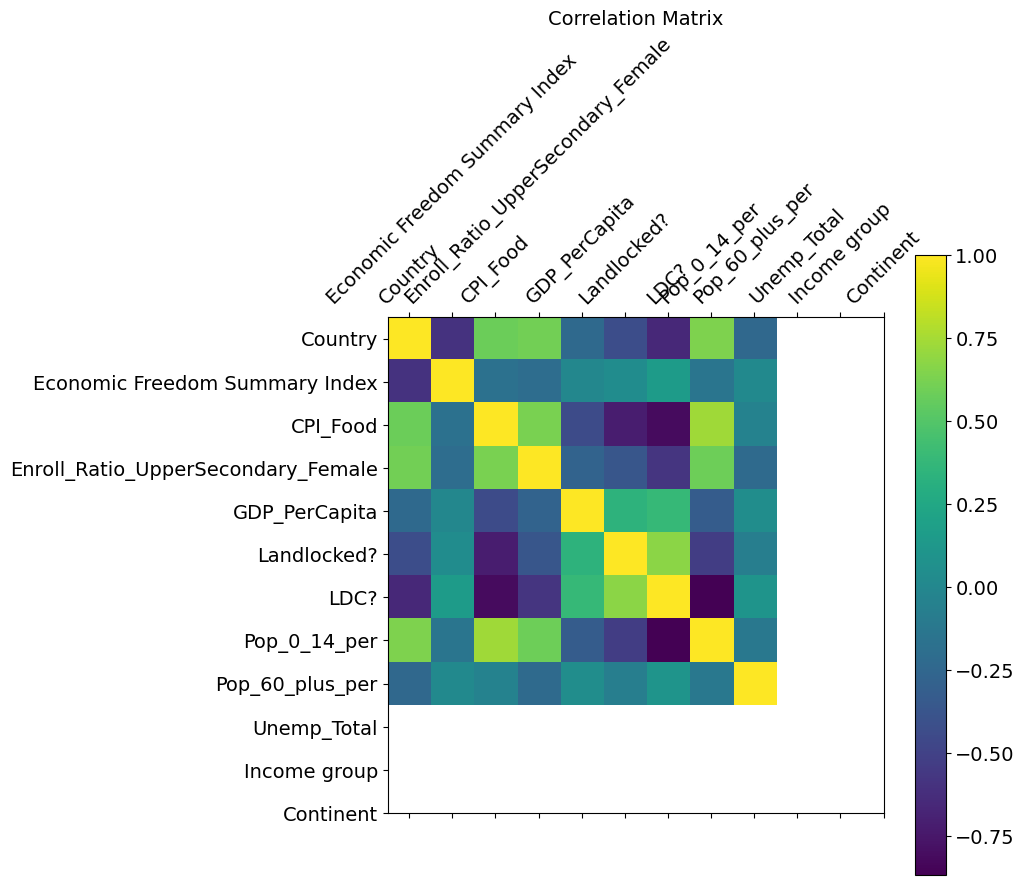

In [49]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 

plt.matshow(df_recent_sub.corr(), fignum=f.number) # type of plot

plt.xticks(range(df_recent_sub.shape[1]), df_recent_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_recent_sub.shape[1]), df_recent_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

plt.savefig("heatmap_blue.png") 

/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_13545/3956342008.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_recent_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


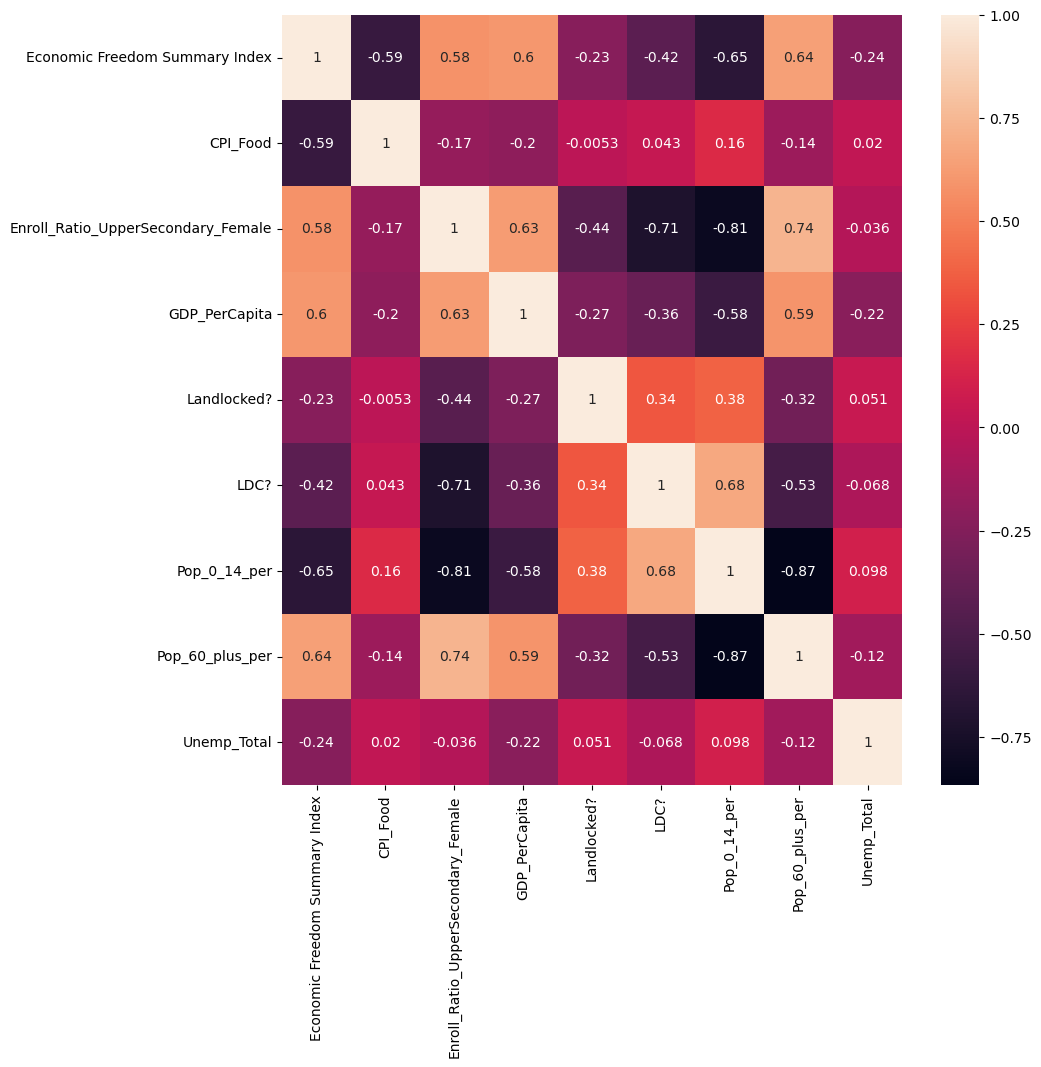

In [50]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_recent_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

plt.savefig("heatmap_warm.png") 

### 5. Scatterplot

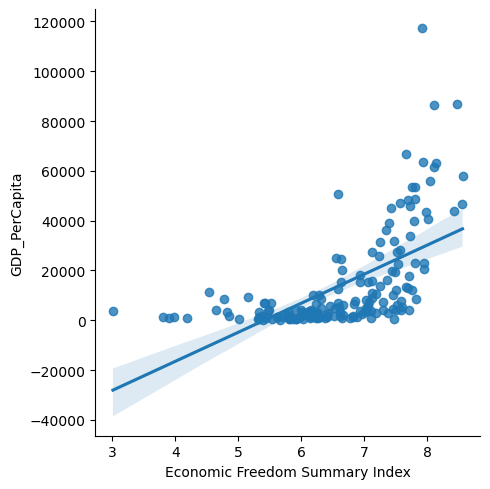

In [51]:
# Create a scatterplot

sns.lmplot(x = 'Economic Freedom Summary Index', y = 'GDP_PerCapita', data = df_recent_sub)

plt.savefig("Scatterplot_GDP.png") 

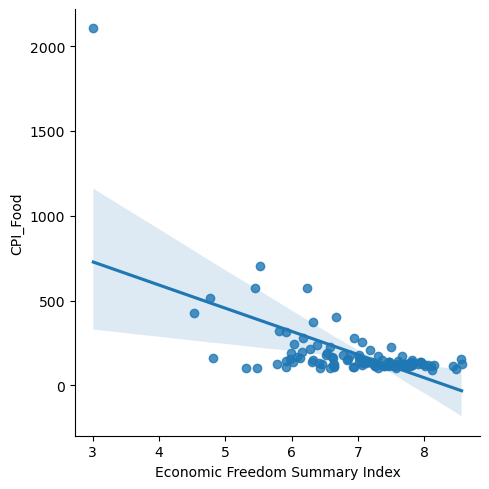

In [52]:
# Create a scatterplot

sns.lmplot(x = 'Economic Freedom Summary Index', y = 'CPI_Food', data = df_recent_sub)

plt.savefig("Scatterplot_CPI.png") 

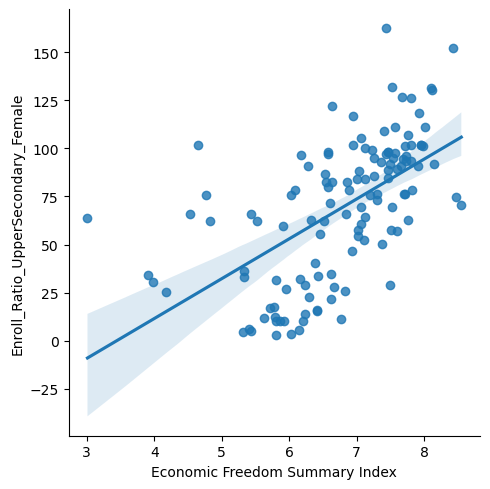

In [53]:
# Create a scatterplot

sns.lmplot(x = 'Economic Freedom Summary Index', y = 'Enroll_Ratio_UpperSecondary_Female', data =df_recent_sub)

plt.savefig("Scatterplot_FemaleEducation.png") 

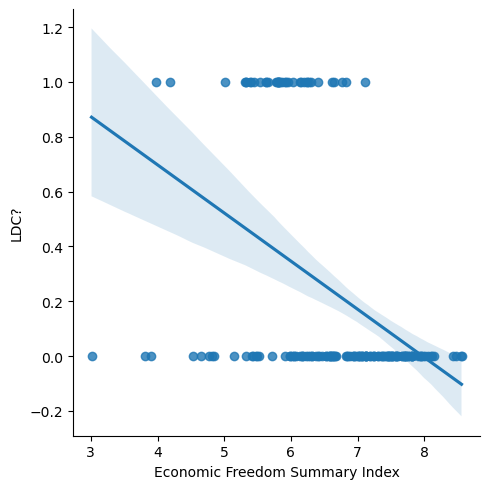

In [54]:
# Create a scatterplot

sns.lmplot(x = 'Economic Freedom Summary Index', y = 'LDC?', data = df_recent_sub)

plt.savefig("Scatterplot_LDC.png") 

o	Consider the CPI scatterplot. There are several outliers that skew this scatterplot. We are not surprised that the majority of countries have relatively stable inflation rates – a CPI close to 100. Nonetheless, the three dots that represent countries with very, very high inflation rates make it hard to read this chart. Any idea about how to eliminate these from the chart? <br> <br>
o	The scatterplot showing upper secondary enrollment ratios for women is strong and positive. There is some variance here, but this is relatively consistent with what we normally see in economic data. <br> <br>
o	The scatterplot showing GDP and Economic Freedom Index is strong and positive. There are several notable outliers and I wonder if the trend line among the handful of “richest” countries (in terms of GDP per capita) should be non-linear. Nonetheless, the highest Economic Freedom Index countries do tend to have highest per-capita GDP. <br> <br>
o	Regarding the LDC scatterplot, I was curious as to what this data would do in a scatterplot in seaborne. Recall that the variable LDC takes either a 0 if the country is not categorized an LDC and a 1 if it is. We have a negative relationship. I am interested to know which countries are considered LDCs, but have high Economic Freedom, and whether they are more likely to move out of LDC status. Perhaps we can explore that question during the time series analysis. <br> <br>


### 6. Categorial Plot

I am using the Word Bank's Income categories to separate the data in this exmple. 

In [55]:
#Checking counts of the Income group variable.
df_recent_sub['Income group'].value_counts(dropna = False)

High income            55
Lower middle income    47
Upper middle income    40
Low income             22
NaN                     1
Name: Income group, dtype: int64

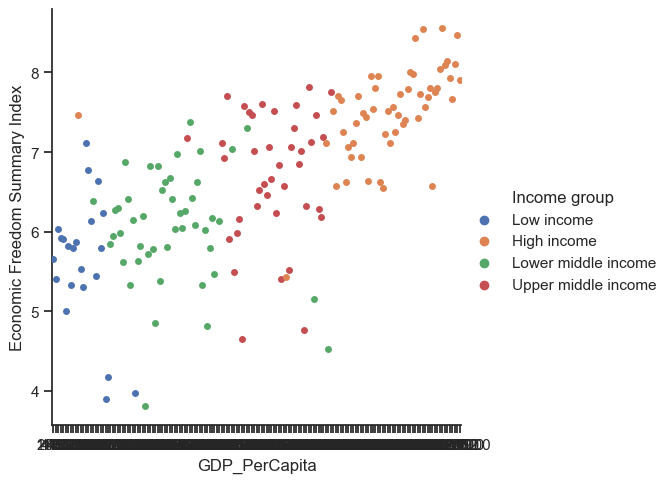

In [56]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="GDP_PerCapita", y="Economic Freedom Summary Index", hue="Income group", data=df_recent)

plt.savefig("CategoricalPlot.png") 

### 7. Exporting data to CSV files

In [58]:
# Export as csv file.

df_recent_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Subset_Recent_Year_Data.csv'))

In [59]:
df_recent_sub.head(10)

,Country,Economic Freedom Summary Index,CPI_Food,Enroll_Ratio_UpperSecondary_Female,GDP_PerCapita,Landlocked?,LDC?,Pop_0_14_per,Pop_60_plus_per,Unemp_Total,Income group,Continent
0,Albania,7.60,144.9,56.8,5181.0,0,0,16.1,23.5,10.9,Upper middle income,Europe
1,Algeria,4.82,161.7,62.4,3368.0,0,0,30.6,9.7,12.2,Lower middle income,Africa
2,Angola,5.38,NaN,NaN,1896.0,0,1,45.0,4.3,8.3,Lower middle income,Africa
3,Argentina,4.77,517.0,75.6,8476.0,0,0,23.1,16.2,10.6,Upper middle income,South America
4,Armenia,7.58,NaN,NaN,4266.0,1,0,20.5,20.3,20.8,Upper middle income,Asia
5,Australia,8.05,117.9,NaN,55823.0,0,0,18.2,22.6,5.0,High income,Oceania
6,Austria,7.69,124.8,94.3,48106.0,0,0,14.4,26.7,5.4,High income,Europe
7,Azerbaijan,5.99,188.5,NaN,4202.0,1,0,23.5,12.5,6.6,Upper middle income,Asia
8,Bahamas,6.55,NaN,82.6,25194.0,0,0,19.1,13.9,12.9,High income,North America
9,Bahrain,7.44,126.6,97.3,19925.0,0,0,20.2,6.9,1.8,High income,Asia
